In [ ]:
from google.colab import drive 
drive.mount('/content/drive') 

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle_dataset'

In [ ]:
!kaggle datasets download -d kukuroo3/room-occupancy-detection-data-iot-sensor

  0% 0.00/263k [00:00<?, ?B/s]
100% 263k/263k [00:00<00:00, 39.3MB/s]


In [ ]:
!unzip '/content/room-occupancy-detection-data-iot-sensor.zip' -d '/content/drive/MyDrive/dataset/'  

Archive:  /content/room-occupancy-detection-data-iot-sensor.zip
  inflating: /content/drive/MyDrive/dataset/Occupancy.csv  


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier                                                                                                                                                           

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm

from sklearn import tree

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from joblib import dump, load

from scipy.stats import norm
import pandas as pd

In [ ]:
#humidy - Amount of water in the air
df=pd.read_csv('/content/drive/MyDrive/dataset/Occupancy.csv')
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [ ]:
df.describe() 

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


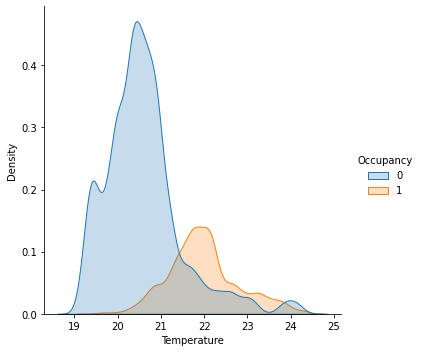

In [ ]:
sns.displot(df, x="Temperature", hue="Occupancy", kind="kde", fill=True)

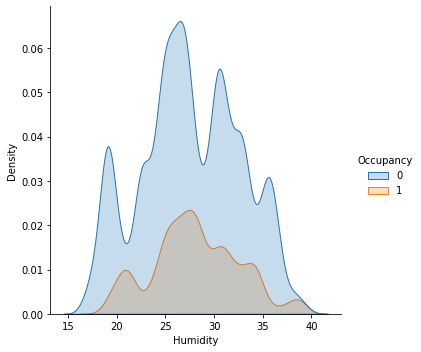

In [ ]:
sns.displot(df, x="Humidity", hue="Occupancy", kind="kde", fill=True)

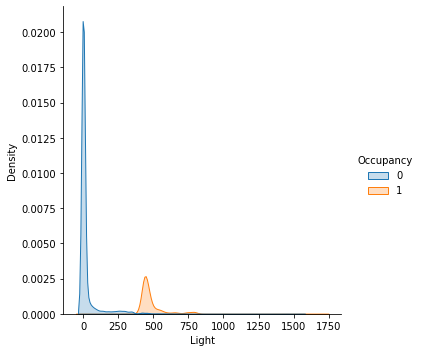

In [ ]:
sns.displot(df, x="Light", hue="Occupancy", kind="kde", fill=True)

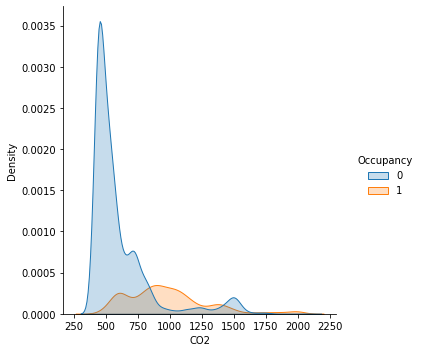

In [ ]:
sns.displot(df, x="CO2", hue="Occupancy", kind="kde", fill=True)

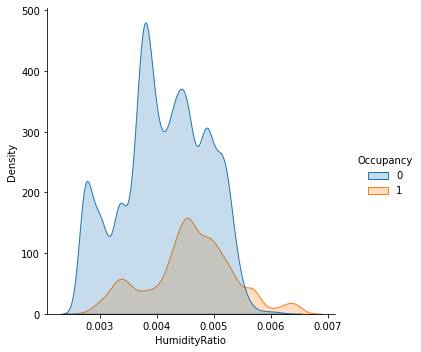

In [ ]:
sns.displot(df, x="HumidityRatio", hue="Occupancy", kind="kde", fill=True)

In [ ]:
y=df.Occupancy
x=df.drop(['Occupancy','date'],axis=1) 

In [ ]:
def minMaxScaler(x):
  scaler = MinMaxScaler()
  transformer_X = scaler.fit_transform(x) 
  return transformer_X
x=minMaxScaler(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7,stratify=y)

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': np.arange(10,200,10)
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Naives Bayes':{
        'model':GaussianNB(),
        'params':{}
    },
    'KNN':{
            'model':KNeighborsClassifier(),
            'params':{
                'n_neighbors':np.arange(1,22)
            }
        },
        'Decision Tree':{
            'model':tree.DecisionTreeClassifier(),
            'params':{}
        },
        # 'Neural Network':{  
        #     'model':MLPClassifier(),
        #     'params':{
        #         'solver':['sgd', 'adam', 'lbfgs'],
        #         'alpha':[1e-5],
        #         'hidden_layer_sizes':[(25,25),(50,50),(75,75),(100,100),(125,125),(150,150),(175,175),(200,200)], 
        #         'random_state':[1]
        #     }
        # }
}

In [ ]:
scores=[]

In [ ]:
for model_name, mp in model_params.items():
    cross_vali =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    cross_vali.fit(X_train, y_train)

    scores.append({
        'model': model_name,
        'best_score': cross_vali.best_score_,
        'best_params': cross_vali.best_params_
    }) 
    
cross_vali_DF = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
column_cv = cross_vali_DF["best_score"] 
cv_max_index = column_cv.idxmax() 

random_forest give better accuracy...  random_forest accuracy is 0.9933986275191107 best params is  {'n_estimators': 30}


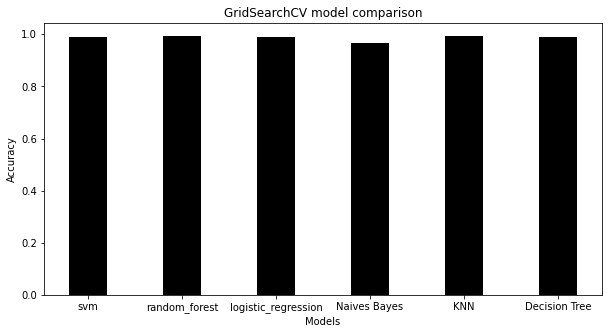

In [ ]:
train_split_X = [scores[0]['best_score'],scores[1]['best_score'],scores[2]['best_score'],scores[3]['best_score'],scores[4]['best_score'],scores[5]['best_score']]
train_split_Y=[scores[0]['model'],scores[1]['model'],scores[2]['model'],scores[3]['model'],scores[4]['model'],scores[5]['model']]  
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(train_split_Y, train_split_X, color ='black',width = 0.4)
print(scores[cv_max_index]['model'],'give better accuracy... ',scores[cv_max_index]['model'],'accuracy is',scores[cv_max_index]['best_score'],'best params is ',scores[cv_max_index]['best_params'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("GridSearchCV model comparison")
plt.show()

In [ ]:
best_model=RandomForestClassifier(n_estimators= scores[cv_max_index]['best_params']['n_estimators'])
best_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

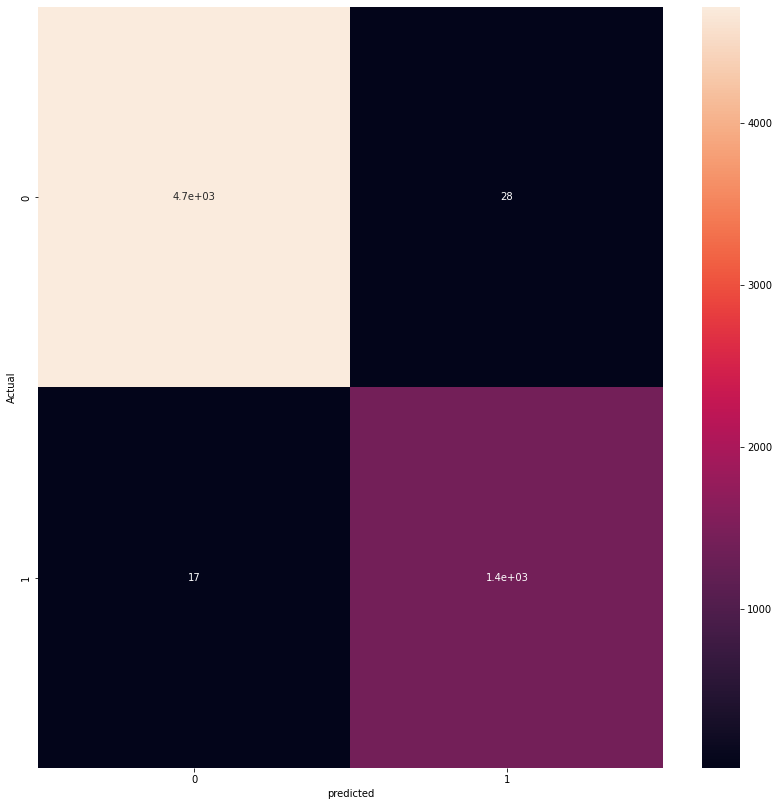

In [ ]:
test_Score=best_model.predict(X_test)
test_CM=confusion_matrix(y_test,test_Score)
plt.figure(figsize=(14, 14))
sns.heatmap(test_CM,annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show() 